In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve,confusion_matrix

In [2]:
# print stop words
import nltk

In [3]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO.SXS08\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# load data for processing
new_data=pd.read_csv("train.csv")

In [6]:
new_data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:

new_data.shape

(20800, 5)

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
# show missing values
new_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# preprocessing data (handling missing data)
new_data.fillna(" ", inplace= True)


In [11]:
# merging the author name and title in new column 
new_data["content"]=new_data['title'] + " " + new_data['author']

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       20800 non-null  int64 
 1   title    20800 non-null  object
 2   author   20800 non-null  object
 3   text     20800 non-null  object
 4   label    20800 non-null  int64 
 5   content  20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [13]:
print(new_data["content"])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: content, Length: 20800, dtype: object


In [14]:
# separating data ,label
x=new_data.drop(["label"],axis=1)
y=new_data["label"]

In [15]:
print(x)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [16]:
# reduce word to root
port_stem=PorterStemmer()


In [17]:
def stemming(myinfo):
    stemmed_info = re.sub('[^a-zA-Z]', ' ', myinfo)
    stemmed_info = stemmed_info.lower()
    stemmed_info = stemmed_info.split()
    stemmed_info = [port_stem.stem(word) for word in stemmed_info if not word in stopwords.words('english')]
    stemmed_info = ' '.join(stemmed_info)
    return stemmed_info
        

In [18]:
new_data['content']=new_data["content"].apply(stemming)

In [19]:
print(new_data['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [20]:
# convert text data to numerical data
x=new_data['content'].values
y=new_data['label'].values

In [21]:
print(x)

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram'
 'nato russia hold parallel exercis balkan alex ansari'
 'keep f aliv david swanson']


In [22]:
print(y)

[1 0 1 ... 0 1 1]


In [23]:
y.shape

(20800,)

In [24]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

vectorizer.fit(x)
x = vectorizer.transform(x)

In [25]:
print(x)

  (0, 120924)	0.226140523354949
  (0, 120905)	0.16826382002320228
  (0, 102032)	0.2576293881500935
  (0, 102020)	0.15156981345661294
  (0, 67718)	0.21477963641234105
  (0, 65179)	0.24743780659041412
  (0, 65156)	0.1725609353808555
  (0, 59155)	0.217175308571348
  (0, 59151)	0.14640851011189912
  (0, 54145)	0.2576293881500935
  (0, 54098)	0.129212674660307
  (0, 38184)	0.2576293881500935
  (0, 38127)	0.13782242065895461
  (0, 30018)	0.2576293881500935
  (0, 30014)	0.159806411053802
  (0, 27982)	0.21477963641234105
  (0, 27981)	0.21259255908441158
  (0, 22685)	0.217175308571348
  (0, 22617)	0.14581355848098373
  (0, 18115)	0.2576293881500935
  (0, 18108)	0.217175308571348
  (0, 2193)	0.2576293881500935
  (0, 2170)	0.15955122578697975
  (1, 129217)	0.3182735454785035
  (1, 129200)	0.1865707574128367
  :	:
  (20797, 5554)	0.2411316421569159
  (20797, 5548)	0.19078458401766185
  (20797, 240)	0.18471891306905075
  (20798, 98823)	0.3086773012428569
  (20798, 98704)	0.14092358066136046
  (2079

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


# train different model to compare between them


In [27]:
def train (model,model_name):
    model.fit(x_train,y_train)
    print(f"training accuracy of {model_name} is {model.score(x_train,y_train)}")
    print(f"test accuracy of {model_name} is {model.score(x_test,y_test)}")
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(x_test)
    ))

In [28]:
model_lr=LogisticRegression()

In [29]:
train(model_lr,LogisticRegression)

training accuracy of <class 'sklearn.linear_model._logistic.LogisticRegression'> is 0.9881610576923077
test accuracy of <class 'sklearn.linear_model._logistic.LogisticRegression'> is 0.9728365384615385


In [30]:
class_report(model_lr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2077
           1       0.95      1.00      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [42]:
predicted=model_lr.predict(x_test)


In [44]:
cm = confusion_matrix(y_test,predicted)

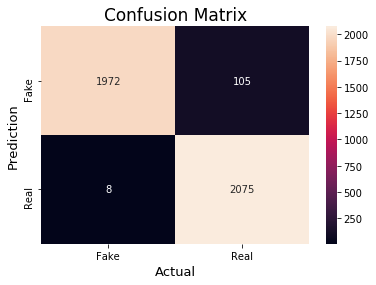

In [45]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [31]:
svc_model=SVC()

In [32]:
train(svc_model,SVC)

training accuracy of <class 'sklearn.svm._classes.SVC'> is 0.9997596153846153
test accuracy of <class 'sklearn.svm._classes.SVC'> is 0.9853365384615385


In [46]:
prediction_svc=svc_model.predict(x_test)


In [47]:
cm = confusion_matrix(y_test,prediction_svc)

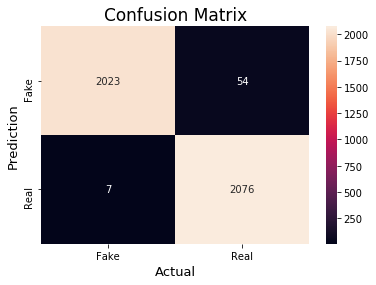

In [48]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [33]:
class_report(svc_model)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2077
           1       0.97      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [34]:
# decision tree classifier
depth_num= range(50,70,2)
training_acc=[]
test_acc=[]
for depth in depth_num:
    tree_model=DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(x_train,y_train)
    training_acc.append(tree_model.score(x_train,y_train))
    test_acc.append(tree_model.score(x_test,y_test))
   

In [35]:
print("training accuracy score: ", training_acc[:3])
print("test accuracy score: ", test_acc[:3])
    

training accuracy score:  [0.9965745192307692, 0.9970552884615385, 0.9974759615384615]
test accuracy score:  [0.9930288461538461, 0.9932692307692308, 0.99375]


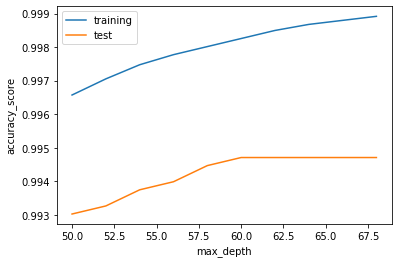

In [36]:
# show graph between number of depth for training and test
plt.plot(depth_num,training_acc,label="training")
plt.plot(depth_num,test_acc,label="test")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.legend()


# from this graph we found that after depth=59 accuracy is not change 

In [51]:
tree_final_model=DecisionTreeClassifier(max_depth=59,random_state=42)
tree_final_model.fit(x_train,y_train)
tree_training_acc = tree_final_model.score(x_train,y_train)
tree_testing_acc = tree_final_model.score(x_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9981370192307693
testing accuracy of DesicionTreeClassifier is 0.9947115384615385


In [52]:
prediction_DT=tree_final_model.predict(x_test)

In [53]:
cm = confusion_matrix(y_test,prediction_DT)

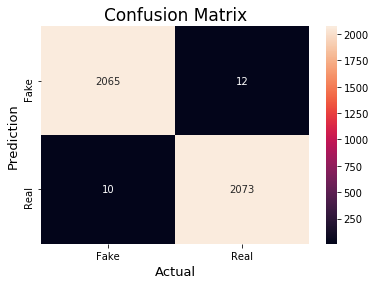

In [54]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [55]:
class_report(tree_final_model)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [57]:
# SHOW graph to compare between results

models=pd.DataFrame({"Models":['LogisticRegression',"SVC",'DecisionTreeClassifier'],"score":[model_lr.score(x_test,y_test),svc_model.score(x_test,y_test),tree_testing_acc]})
models.sort_values(by='score',ascending=False)

,Models,score
2,DecisionTreeClassifier,0.994712
1,SVC,0.985337
0,LogisticRegression,0.972837


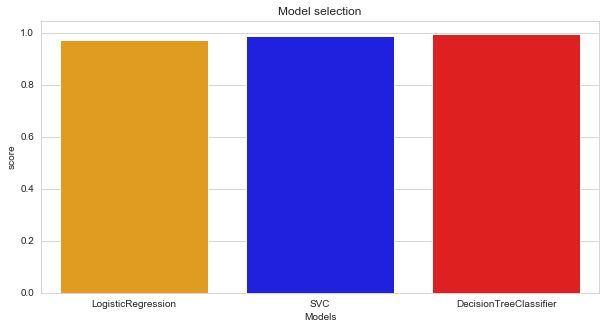

In [58]:
colors=["orange","blue","red"]
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models["Models"],y=models['score'],palette=colors)
plt.xlabel("Models")
plt.ylabel("score")
plt.title("Model selection")
plt.show()

In [ ]:
# acco to this graph 